# TF and TF-IDF: Give a set of documents, objective is to convert the them into text vectors using TF and TF-IDF models. Alalyse the vectors and show why TF fails and TF-IDF is better than TF on a particular text dataset. Use the vectors to train a simple ANN model to learn text classification application.

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import re

print("Libraries imported successfully!")
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)

Libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.3.1


In [3]:
# Sample sentences for demonstration
sentences = [
    "The cat sat on the mat",
    "The dog ran in the park",
    "A cat and a dog are pets",
    "The park has many trees"
]

print("📝 Input Sentences:")
for i, sentence in enumerate(sentences, 1):
    print(f"   {i}. {sentence}")
print(f"\nTotal sentences: {len(sentences)}")

📝 Input Sentences:
   1. The cat sat on the mat
   2. The dog ran in the park
   3. A cat and a dog are pets
   4. The park has many trees

Total sentences: 4


# Text Preprocessing Function and Tokenize the sentences

In [4]:
def preprocess_text(text, lowercase=True, remove_punctuation=True):
    """Clean and preprocess the text"""
    if lowercase:
        text = text.lower()
    if remove_punctuation:
        text = re.sub(r'[^\w\s]', '', text)
    return text.split()

# Test preprocessing on our sentences
print("🔧 Text Preprocessing Results:")
for i, sentence in enumerate(sentences, 1):
    processed = preprocess_text(sentence)
    print(f"   Sentence {i}: {processed}")

🔧 Text Preprocessing Results:
   Sentence 1: ['the', 'cat', 'sat', 'on', 'the', 'mat']
   Sentence 2: ['the', 'dog', 'ran', 'in', 'the', 'park']
   Sentence 3: ['a', 'cat', 'and', 'a', 'dog', 'are', 'pets']
   Sentence 4: ['the', 'park', 'has', 'many', 'trees']


# Build Vocabulary
### The vocabulary is our "dictionary" of all unique words across all sentences. Each word gets a unique index, which will become a dimension in our vector space. We have 15 unique words, so our vectors will be 15-dimensional.

In [5]:
# Build vocabulary from all sentences
def build_vocabulary(sentences):
    """Build vocabulary from all sentences"""
    all_words = set()
    for sentence in sentences:
        words = preprocess_text(sentence)
        all_words.update(words)
    
    # Create word to index mapping
    vocabulary = {word: idx for idx, word in enumerate(sorted(all_words))}
    return vocabulary

vocabulary = build_vocabulary(sentences)
vocab_size = len(vocabulary)

print("🔤 VOCABULARY BUILDING:")
print(f"Vocabulary built with {vocab_size} unique words")
print("\nVocabulary (word -> index):")
for word, idx in vocabulary.items():
    print(f"   '{word}' -> {idx}")

🔤 VOCABULARY BUILDING:
Vocabulary built with 16 unique words

Vocabulary (word -> index):
   'a' -> 0
   'and' -> 1
   'are' -> 2
   'cat' -> 3
   'dog' -> 4
   'has' -> 5
   'in' -> 6
   'many' -> 7
   'mat' -> 8
   'on' -> 9
   'park' -> 10
   'pets' -> 11
   'ran' -> 12
   'sat' -> 13
   'the' -> 14
   'trees' -> 15


# Calculate Term Frequency (TF)

In [7]:
words = preprocess_text(sentence)
word_count = Counter(words)
total_words = len(words)
words
word_count
total_words

5

In [8]:
word_count

Counter({'the': 1, 'park': 1, 'has': 1, 'many': 1, 'trees': 1})

In [11]:
def calculate_tf(sentence):
    """Calculate Term Frequency for a sentence"""
    words = preprocess_text(sentence)
    word_count = Counter(words)
    total_words = len(words)
    
    # Calculate TF for each word
    tf_dict = {}
    for word, count in word_count.items():
        tf_dict[word] = count / total_words
        
    return tf_dict, word_count, total_words

print("📊 TERM FREQUENCY CALCULATION:")
for i, sentence in enumerate(sentences, 1):
    print(f"\nSentence {i}: '{sentence}'")
    tf_dict, word_count, total_words = calculate_tf(sentence)
    
    print(f"   Word counts: {dict(word_count)}")
    print(f"   Total words: {total_words}")
    print("   Term Frequencies (TF = count / total_words):")
    for word, tf in tf_dict.items():
        count = word_count[word]
        print(f"      '{word}': {count}/{total_words} = {tf:.3f}")

📊 TERM FREQUENCY CALCULATION:

Sentence 1: 'The cat sat on the mat'
   Word counts: {'the': 2, 'cat': 1, 'sat': 1, 'on': 1, 'mat': 1}
   Total words: 6
   Term Frequencies (TF = count / total_words):
      'the': 2/6 = 0.333
      'cat': 1/6 = 0.167
      'sat': 1/6 = 0.167
      'on': 1/6 = 0.167
      'mat': 1/6 = 0.167

Sentence 2: 'The dog ran in the park'
   Word counts: {'the': 2, 'dog': 1, 'ran': 1, 'in': 1, 'park': 1}
   Total words: 6
   Term Frequencies (TF = count / total_words):
      'the': 2/6 = 0.333
      'dog': 1/6 = 0.167
      'ran': 1/6 = 0.167
      'in': 1/6 = 0.167
      'park': 1/6 = 0.167

Sentence 3: 'A cat and a dog are pets'
   Word counts: {'a': 2, 'cat': 1, 'and': 1, 'dog': 1, 'are': 1, 'pets': 1}
   Total words: 7
   Term Frequencies (TF = count / total_words):
      'a': 2/7 = 0.286
      'cat': 1/7 = 0.143
      'and': 1/7 = 0.143
      'dog': 1/7 = 0.143
      'are': 1/7 = 0.143
      'pets': 1/7 = 0.143

Sentence 4: 'The park has many trees'
   Word c

# Convert Sentences to Vectors

In [12]:
def sentence_to_vector(sentence, vocabulary):
    """Convert a sentence to TF vector"""
    tf_dict, _, _ = calculate_tf(sentence)
    vocab_size = len(vocabulary)
    
    # Create vector with zeros
    vector = np.zeros(vocab_size)
    
    # Fill vector with TF values
    for word, tf_value in tf_dict.items():
        if word in vocabulary:
            idx = vocabulary[word]
            vector[idx] = tf_value
            
    return vector

# Convert all sentences to vectors
vectors = []
for sentence in sentences:
    vector = sentence_to_vector(sentence, vocabulary)
    vectors.append(vector)

vectors = np.array(vectors)

print("🎯 SENTENCE-TO-VECTOR CONVERSION:")
print(f"Created {len(vectors)} vectors, each with {len(vectors[0])} dimensions")
print(f"Vector shape: {vectors.shape}")

# Show first vector as example
print(f"\nFirst sentence vector ('{sentences[0]}'):")
print("Non-zero elements:")
for i, val in enumerate(vectors[0]):
    if val > 0:
        word = list(vocabulary.keys())[list(vocabulary.values()).index(i)]
        print(f"   Position {i} ('{word}'): {val:.3f}")

🎯 SENTENCE-TO-VECTOR CONVERSION:
Created 4 vectors, each with 16 dimensions
Vector shape: (4, 16)

First sentence vector ('The cat sat on the mat'):
Non-zero elements:
   Position 3 ('cat'): 0.167
   Position 8 ('mat'): 0.167
   Position 9 ('on'): 0.167
   Position 13 ('sat'): 0.167
   Position 14 ('the'): 0.333


# Visualize Vectors as DataFrame

In [13]:
# Create a DataFrame for better visualization
vocab_words = list(vocabulary.keys())
df = pd.DataFrame(vectors, columns=vocab_words)
df.index = [f"Sentence {i+1}" for i in range(len(sentences))]

print("📋 TF VECTORS TABLE:")
print("Each column is a word, each row is a sentence")
print("Values show Term Frequency (0 = word not in sentence)")
print("\n" + "="*80)
print(df.round(3))

📋 TF VECTORS TABLE:
Each column is a word, each row is a sentence
Values show Term Frequency (0 = word not in sentence)

                a    and    are    cat    dog  has     in  many    mat     on  \
Sentence 1  0.000  0.000  0.000  0.167  0.000  0.0  0.000   0.0  0.167  0.167   
Sentence 2  0.000  0.000  0.000  0.000  0.167  0.0  0.167   0.0  0.000  0.000   
Sentence 3  0.286  0.143  0.143  0.143  0.143  0.0  0.000   0.0  0.000  0.000   
Sentence 4  0.000  0.000  0.000  0.000  0.000  0.2  0.000   0.2  0.000  0.000   

             park   pets    ran    sat    the  trees  
Sentence 1  0.000  0.000  0.000  0.167  0.333    0.0  
Sentence 2  0.167  0.000  0.167  0.000  0.333    0.0  
Sentence 3  0.000  0.143  0.000  0.000  0.000    0.0  
Sentence 4  0.200  0.000  0.000  0.000  0.200    0.2  


# Calculate Vector Similarity

In [14]:
def cosine_similarity(v1, v2):
    """Calculate cosine similarity between two vectors"""
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0
    return dot_product / (norm_v1 * norm_v2)

print("🔍 VECTOR SIMILARITY ANALYSIS:")
print("Calculating cosine similarity between sentences...")
print("(1.0 = identical, 0.0 = completely different)")

# Calculate similarities between first sentence and others
base_vector = vectors[0]  # "The cat sat on the mat"
base_sentence = sentences[0]

print(f"\nComparing: '{base_sentence}' with other sentences:")

for i, vector in enumerate(vectors[1:], 1):
    similarity = cosine_similarity(base_vector, vector)
    print(f"   vs '{sentences[i]}': {similarity:.3f}")

# Show all pairwise similarities
print("\nAll pairwise similarities:")
similarity_matrix = np.zeros((len(sentences), len(sentences)))
for i in range(len(sentences)):
    for j in range(len(sentences)):
        similarity_matrix[i][j] = cosine_similarity(vectors[i], vectors[j])

sim_df = pd.DataFrame(similarity_matrix, 
                     index=[f"Sent {i+1}" for i in range(len(sentences))],
                     columns=[f"Sent {i+1}" for i in range(len(sentences))])
print(sim_df.round(3))

🔍 VECTOR SIMILARITY ANALYSIS:
Calculating cosine similarity between sentences...
(1.0 = identical, 0.0 = completely different)

Comparing: 'The cat sat on the mat' with other sentences:
   vs 'The dog ran in the park': 0.500
   vs 'A cat and a dog are pets': 0.118
   vs 'The park has many trees': 0.316

All pairwise similarities:
        Sent 1  Sent 2  Sent 3  Sent 4
Sent 1   1.000   0.500   0.118   0.316
Sent 2   0.500   1.000   0.118   0.474
Sent 3   0.118   0.118   1.000   0.000
Sent 4   0.316   0.474   0.000   1.000


# BAG OF WORDS (BOW) VECTORIZATION

In [15]:
print("🛍️ BAG OF WORDS (BOW) VECTORIZATION")
print("="*50)
print("\n💡 Key Concept:")
print("   BoW counts how many times each word appears in a document")
print("   Unlike TF, BoW uses raw counts (not normalized frequencies)")
print("   'Bag' = order doesn't matter, only word counts matter")

def calculate_bow_counts(sentence):
    """Calculate word counts for BoW representation"""
    words = preprocess_text(sentence)
    word_count = Counter(words)
    total_words = len(words)
    return word_count, total_words

print("\n📊 BOW COUNT ANALYSIS:")
for i, sentence in enumerate(sentences, 1):
    print(f"\nSentence {i}: '{sentence}'")
    word_count, total_words = calculate_bow_counts(sentence)
    
    print(f"   Total words: {total_words}")
    print(f"   Word counts: {dict(word_count)}")
    print("   BoW representation (word: count):")
    for word, count in sorted(word_count.items()):
        print(f"      '{word}': {count}")

🛍️ BAG OF WORDS (BOW) VECTORIZATION

💡 Key Concept:
   BoW counts how many times each word appears in a document
   Unlike TF, BoW uses raw counts (not normalized frequencies)
   'Bag' = order doesn't matter, only word counts matter

📊 BOW COUNT ANALYSIS:

Sentence 1: 'The cat sat on the mat'
   Total words: 6
   Word counts: {'the': 2, 'cat': 1, 'sat': 1, 'on': 1, 'mat': 1}
   BoW representation (word: count):
      'cat': 1
      'mat': 1
      'on': 1
      'sat': 1
      'the': 2

Sentence 2: 'The dog ran in the park'
   Total words: 6
   Word counts: {'the': 2, 'dog': 1, 'ran': 1, 'in': 1, 'park': 1}
   BoW representation (word: count):
      'dog': 1
      'in': 1
      'park': 1
      'ran': 1
      'the': 2

Sentence 3: 'A cat and a dog are pets'
   Total words: 7
   Word counts: {'a': 2, 'cat': 1, 'and': 1, 'dog': 1, 'are': 1, 'pets': 1}
   BoW representation (word: count):
      'a': 2
      'and': 1
      'are': 1
      'cat': 1
      'dog': 1
      'pets': 1

Sentence 4: 'T

# Convert Sentences to BoW Vectors

In [16]:
def sentence_to_bow_vector(sentence, vocabulary):
    """Convert a sentence to BoW vector using raw counts"""
    word_count, _ = calculate_bow_counts(sentence)
    vocab_size = len(vocabulary)
    
    # Create vector with zeros
    vector = np.zeros(vocab_size, dtype=int)  # Use int for counts
    
    # Fill vector with word counts
    for word, count in word_count.items():
        if word in vocabulary:
            idx = vocabulary[word]
            vector[idx] = count
            
    return vector

# Convert all sentences to BoW vectors
bow_vectors = []
for sentence in sentences:
    vector = sentence_to_bow_vector(sentence, vocabulary)
    bow_vectors.append(vector)

bow_vectors = np.array(bow_vectors)

print("🎯 BOW VECTOR CONVERSION:")
print(f"Created {len(bow_vectors)} BoW vectors")
print(f"Vector shape: {bow_vectors.shape}")
print("Data type: integers (raw counts)")

# Show first vector as example
print(f"\nFirst sentence BoW vector ('{sentences[0]}'):")
print("Non-zero elements (word counts):")
for i, count in enumerate(bow_vectors[0]):
    if count > 0:
        word = list(vocabulary.keys())[list(vocabulary.values()).index(i)]
        print(f"   Position {i} ('{word}'): {count}")

print(f"\nVector sum check: {np.sum(bow_vectors[0])} (should equal total words: 6)")

🎯 BOW VECTOR CONVERSION:
Created 4 BoW vectors
Vector shape: (4, 16)
Data type: integers (raw counts)

First sentence BoW vector ('The cat sat on the mat'):
Non-zero elements (word counts):
   Position 3 ('cat'): 1
   Position 8 ('mat'): 1
   Position 9 ('on'): 1
   Position 13 ('sat'): 1
   Position 14 ('the'): 2

Vector sum check: 6 (should equal total words: 6)


# Visualize BoW Vectors

In [17]:
# Create DataFrame for BoW vectors
vocab_words = list(vocabulary.keys())
bow_df = pd.DataFrame(bow_vectors, columns=vocab_words, dtype=int)
bow_df.index = [f"Sentence {i+1}" for i in range(len(sentences))]

print("📋 BAG OF WORDS VECTORS TABLE:")
print("Each column = word, each row = sentence")
print("Values = raw word counts (integers)")
print("\n" + "="*80)
print(bow_df)

# Show statistics
print(f"\n📊 BoW Vector Statistics:")
print(f"   • Total vocabulary size: {len(vocab_words)}")
print(f"   • Average words per sentence: {np.mean(np.sum(bow_vectors, axis=1)):.1f}")
print(f"   • Max word count in any sentence: {np.max(bow_vectors)}")
print(f"   • Sparsity: {np.mean(bow_vectors == 0)*100:.1f}% zeros")

# Most frequent words across all sentences
total_counts = np.sum(bow_vectors, axis=0)
word_frequency = [(vocab_words[i], total_counts[i]) for i in range(len(vocab_words))]
word_frequency.sort(key=lambda x: x[1], reverse=True)

print(f"\n🔥 Most frequent words across all sentences:")
for word, count in word_frequency[:5]:
    print(f"   '{word}': {count} total occurrences")

📋 BAG OF WORDS VECTORS TABLE:
Each column = word, each row = sentence
Values = raw word counts (integers)

            a  and  are  cat  dog  has  in  many  mat  on  park  pets  ran  \
Sentence 1  0    0    0    1    0    0   0     0    1   1     0     0    0   
Sentence 2  0    0    0    0    1    0   1     0    0   0     1     0    1   
Sentence 3  2    1    1    1    1    0   0     0    0   0     0     1    0   
Sentence 4  0    0    0    0    0    1   0     1    0   0     1     0    0   

            sat  the  trees  
Sentence 1    1    2      0  
Sentence 2    0    2      0  
Sentence 3    0    0      0  
Sentence 4    0    1      1  

📊 BoW Vector Statistics:
   • Total vocabulary size: 16
   • Average words per sentence: 6.0
   • Max word count in any sentence: 2
   • Sparsity: 67.2% zeros

🔥 Most frequent words across all sentences:
   'the': 5 total occurrences
   'a': 2 total occurrences
   'cat': 2 total occurrences
   'dog': 2 total occurrences
   'park': 2 total occurrence

# BoW Similarity Analysis

In [18]:
def cosine_similarity(v1, v2):
    """Calculate cosine similarity between two vectors"""
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0
    return dot_product / (norm_v1 * norm_v2)

def euclidean_distance(v1, v2):
    """Calculate Euclidean distance between two vectors"""
    return np.sqrt(np.sum((v1 - v2) ** 2))

def manhattan_distance(v1, v2):
    """Calculate Manhattan distance between two vectors"""
    return np.sum(np.abs(v1 - v2))

print("🔍 BOW SIMILARITY ANALYSIS:")
print("Multiple similarity metrics for BoW vectors")

# Calculate all pairwise similarities
n_sentences = len(sentences)
cosine_sim_matrix = np.zeros((n_sentences, n_sentences))
euclidean_dist_matrix = np.zeros((n_sentences, n_sentences))
manhattan_dist_matrix = np.zeros((n_sentences, n_sentences))

for i in range(n_sentences):
    for j in range(n_sentences):
        cosine_sim_matrix[i][j] = cosine_similarity(bow_vectors[i], bow_vectors[j])
        euclidean_dist_matrix[i][j] = euclidean_distance(bow_vectors[i], bow_vectors[j])
        manhattan_dist_matrix[i][j] = manhattan_distance(bow_vectors[i], bow_vectors[j])

# Create DataFrames for visualization
sentence_labels = [f"Sent {i+1}" for i in range(n_sentences)]

cosine_df = pd.DataFrame(cosine_sim_matrix, index=sentence_labels, columns=sentence_labels)
euclidean_df = pd.DataFrame(euclidean_dist_matrix, index=sentence_labels, columns=sentence_labels)
manhattan_df = pd.DataFrame(manhattan_dist_matrix, index=sentence_labels, columns=sentence_labels)

print("\n📐 Cosine Similarity Matrix (higher = more similar):")
print(cosine_df.round(3))

print("\n📏 Euclidean Distance Matrix (lower = more similar):")
print(euclidean_df.round(3))

print("\n📊 Manhattan Distance Matrix (lower = more similar):")
print(manhattan_df.round(3))

🔍 BOW SIMILARITY ANALYSIS:
Multiple similarity metrics for BoW vectors

📐 Cosine Similarity Matrix (higher = more similar):
        Sent 1  Sent 2  Sent 3  Sent 4
Sent 1   1.000   0.500   0.118   0.316
Sent 2   0.500   1.000   0.118   0.474
Sent 3   0.118   0.118   1.000   0.000
Sent 4   0.316   0.474   0.000   1.000

📏 Euclidean Distance Matrix (lower = more similar):
        Sent 1  Sent 2  Sent 3  Sent 4
Sent 1   0.000   2.828   3.873   3.000
Sent 2   2.828   0.000   3.873   2.646
Sent 3   3.873   3.873   0.000   3.742
Sent 4   3.000   2.646   3.742   0.000

📊 Manhattan Distance Matrix (lower = more similar):
        Sent 1  Sent 2  Sent 3  Sent 4
Sent 1     0.0     8.0    11.0     9.0
Sent 2     8.0     0.0    11.0     7.0
Sent 3    11.0    11.0     0.0    12.0
Sent 4     9.0     7.0    12.0     0.0


# TF-IDF VECTORIZATION

In [19]:
print("🔍 TF-IDF (TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY)")
print("="*60)
print("\n💡 Key Concept:")
print("   TF-IDF = TF (Term Frequency) × IDF (Inverse Document Frequency)")
print("   • TF: How important is a word in THIS document?")
print("   • IDF: How rare is this word across ALL documents?")
print("   • TF-IDF: Balances local importance with global rarity")

print("\n🎯 TF-IDF Intuition:")
print("   • High TF-IDF: Word appears frequently in few documents (distinctive)")
print("   • Low TF-IDF: Word appears rarely OR in many documents (less distinctive)")
print("   • Goal: Reduce impact of common words, boost distinctive words")

print("\n📊 Mathematical Formulation:")
print("   TF = (word_count_in_doc) / (total_words_in_doc)")
print("   IDF = log(total_documents / documents_containing_word)")
print("   TF-IDF = TF × IDF")

print(f"\n📈 For our dataset:")
print(f"   • Total documents: {len(sentences)}")
print(f"   • Common words (like 'the') will get low IDF")
print(f"   • Rare words (like 'trees') will get high IDF")

🔍 TF-IDF (TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY)

💡 Key Concept:
   TF-IDF = TF (Term Frequency) × IDF (Inverse Document Frequency)
   • TF: How important is a word in THIS document?
   • IDF: How rare is this word across ALL documents?
   • TF-IDF: Balances local importance with global rarity

🎯 TF-IDF Intuition:
   • High TF-IDF: Word appears frequently in few documents (distinctive)
   • Low TF-IDF: Word appears rarely OR in many documents (less distinctive)
   • Goal: Reduce impact of common words, boost distinctive words

📊 Mathematical Formulation:
   TF = (word_count_in_doc) / (total_words_in_doc)
   IDF = log(total_documents / documents_containing_word)
   TF-IDF = TF × IDF

📈 For our dataset:
   • Total documents: 4
   • Common words (like 'the') will get low IDF
   • Rare words (like 'trees') will get high IDF


# Calculate IDF (Inverse Document Frequency)

In [21]:
import math
def calculate_idf(sentences, vocabulary):
    """Calculate IDF for each word in vocabulary"""
    total_docs = len(sentences)
    word_doc_count = Counter()
    
    # Count in how many documents each word appears
    for sentence in sentences:
        words = set(preprocess_text(sentence))  # Use set to count each word once per doc
        for word in words:
            if word in vocabulary:
                word_doc_count[word] += 1
    
    # Calculate IDF for each word
    idf_dict = {}
    for word in vocabulary:
        if word in word_doc_count:
            # IDF = log(total_docs / docs_containing_word)
            idf_dict[word] = math.log(total_docs / word_doc_count[word])
        else:
            # If word not found, it appears in 0 docs (shouldn't happen with our vocabulary)
            idf_dict[word] = math.log(total_docs)
    
    return idf_dict, word_doc_count

idf_dict, word_doc_count = calculate_idf(sentences, vocabulary)

print("📊 INVERSE DOCUMENT FREQUENCY (IDF) ANALYSIS:")
print(f"Total documents: {len(sentences)}")

print(f"\nDocument frequency for each word:")
print(f"{'Word':<10} | {'Docs':<4} | {'IDF Formula':<20} | {'IDF Value':<10}")
print("-" * 50)

# Sort words by IDF value (descending)
sorted_idf = sorted(idf_dict.items(), key=lambda x: x[1], reverse=True)

for word, idf_val in sorted_idf:
    doc_count = word_doc_count.get(word, 0)
    formula = f"log({len(sentences)}/{doc_count})"
    print(f"{word:<10} | {doc_count:<4} | {formula:<20} | {idf_val:<10.3f}")

print(f"\n🔍 IDF Interpretation:")
print(f"   • Higher IDF = More distinctive/rare word")
print(f"   • Lower IDF = More common word")
print(f"   • Words in fewer documents get higher IDF scores")

# Group words by IDF values
unique_words = [word for word, idf in sorted_idf if idf > 1.0]
common_words = [word for word, idf in sorted_idf if 0.5 <= idf <= 1.0]
very_common_words = [word for word, idf in sorted_idf if idf < 0.5]

print(f"\n📈 Word Rarity Categories:")
print(f"   • Very Distinctive (IDF > 1.0): {unique_words}")
print(f"   • Moderately Common (0.5 ≤ IDF ≤ 1.0): {common_words}")
print(f"   • Very Common (IDF < 0.5): {very_common_words}")

📊 INVERSE DOCUMENT FREQUENCY (IDF) ANALYSIS:
Total documents: 4

Document frequency for each word:
Word       | Docs | IDF Formula          | IDF Value 
--------------------------------------------------
a          | 1    | log(4/1)             | 1.386     
and        | 1    | log(4/1)             | 1.386     
are        | 1    | log(4/1)             | 1.386     
has        | 1    | log(4/1)             | 1.386     
in         | 1    | log(4/1)             | 1.386     
many       | 1    | log(4/1)             | 1.386     
mat        | 1    | log(4/1)             | 1.386     
on         | 1    | log(4/1)             | 1.386     
pets       | 1    | log(4/1)             | 1.386     
ran        | 1    | log(4/1)             | 1.386     
sat        | 1    | log(4/1)             | 1.386     
trees      | 1    | log(4/1)             | 1.386     
cat        | 2    | log(4/2)             | 0.693     
dog        | 2    | log(4/2)             | 0.693     
park       | 2    | log(4/2)            

# Calculate TF for TF-IDF

In [22]:
def calculate_tf(sentence):
    """Calculate Term Frequency for a sentence"""
    words = preprocess_text(sentence)
    word_count = Counter(words)
    total_words = len(words)
    
    # Calculate TF for each word
    tf_dict = {}
    for word, count in word_count.items():
        tf_dict[word] = count / total_words
        
    return tf_dict, word_count, total_words

print("📊 TERM FREQUENCY (TF) CALCULATION FOR TF-IDF:")
print("(Same as our previous TF tutorial, but shown here for TF-IDF context)")

tf_data = []
for i, sentence in enumerate(sentences, 1):
    print(f"\nSentence {i}: '{sentence}'")
    tf_dict, word_count, total_words = calculate_tf(sentence)
    
    print(f"   Word counts: {dict(word_count)}")
    print(f"   Total words: {total_words}")
    print("   Term Frequencies (for TF-IDF):")
    
    sentence_tf_data = {'sentence': i}
    for word, tf in tf_dict.items():
        count = word_count[word]
        print(f"      '{word}': {count}/{total_words} = {tf:.3f}")
        sentence_tf_data[word] = tf
    
    tf_data.append(sentence_tf_data)

# Create TF matrix for visualization
tf_df = pd.DataFrame(tf_data).fillna(0)
tf_df.set_index('sentence', inplace=True)
tf_df.index = [f"Sentence {i}" for i in tf_df.index]

print(f"\n📋 TF Matrix (will be multiplied by IDF):")
print(tf_df.round(3))

📊 TERM FREQUENCY (TF) CALCULATION FOR TF-IDF:
(Same as our previous TF tutorial, but shown here for TF-IDF context)

Sentence 1: 'The cat sat on the mat'
   Word counts: {'the': 2, 'cat': 1, 'sat': 1, 'on': 1, 'mat': 1}
   Total words: 6
   Term Frequencies (for TF-IDF):
      'the': 2/6 = 0.333
      'cat': 1/6 = 0.167
      'sat': 1/6 = 0.167
      'on': 1/6 = 0.167
      'mat': 1/6 = 0.167

Sentence 2: 'The dog ran in the park'
   Word counts: {'the': 2, 'dog': 1, 'ran': 1, 'in': 1, 'park': 1}
   Total words: 6
   Term Frequencies (for TF-IDF):
      'the': 2/6 = 0.333
      'dog': 1/6 = 0.167
      'ran': 1/6 = 0.167
      'in': 1/6 = 0.167
      'park': 1/6 = 0.167

Sentence 3: 'A cat and a dog are pets'
   Word counts: {'a': 2, 'cat': 1, 'and': 1, 'dog': 1, 'are': 1, 'pets': 1}
   Total words: 7
   Term Frequencies (for TF-IDF):
      'a': 2/7 = 0.286
      'cat': 1/7 = 0.143
      'and': 1/7 = 0.143
      'dog': 1/7 = 0.143
      'are': 1/7 = 0.143
      'pets': 1/7 = 0.143

Sen

# Calculate TF-IDF Vectors

In [23]:
def calculate_tfidf_vector(sentence, vocabulary, idf_dict):
    """Calculate TF-IDF vector for a sentence"""
    tf_dict, _, _ = calculate_tf(sentence)
    vocab_size = len(vocabulary)
    
    # Create vector with zeros
    tfidf_vector = np.zeros(vocab_size)
    
    # Calculate TF-IDF for each word
    for word, tf_value in tf_dict.items():
        if word in vocabulary:
            idx = vocabulary[word]
            idf_value = idf_dict[word]
            tfidf_score = tf_value * idf_value
            tfidf_vector[idx] = tfidf_score
    
    return tfidf_vector

# Calculate TF-IDF vectors for all sentences
tfidf_vectors = []
for sentence in sentences:
    vector = calculate_tfidf_vector(sentence, vocabulary, idf_dict)
    tfidf_vectors.append(vector)

tfidf_vectors = np.array(tfidf_vectors)

print("🎯 TF-IDF VECTOR CALCULATION:")
print(f"Created {len(tfidf_vectors)} TF-IDF vectors")
print(f"Vector shape: {tfidf_vectors.shape}")

# Show detailed calculation for first sentence
print(f"\nDetailed TF-IDF calculation for Sentence 1: '{sentences[0]}'")
tf_dict, _, _ = calculate_tf(sentences[0])

print(f"{'Word':<8} | {'TF':<8} | {'IDF':<8} | {'TF-IDF':<10} | {'Calculation'}")
print("-" * 60)

for word in tf_dict:
    tf_val = tf_dict[word]
    idf_val = idf_dict[word]
    tfidf_val = tf_val * idf_val
    calc = f"{tf_val:.3f} × {idf_val:.3f}"
    print(f"{word:<8} | {tf_val:<8.3f} | {idf_val:<8.3f} | {tfidf_val:<10.3f} | {calc}")

print(f"\n🔍 Key Observations:")
print(f"   • 'the' has high TF (0.333) but low final TF-IDF (0.096) due to low IDF")
print(f"   • Rare words like 'mat', 'sat' get boosted by high IDF")
print(f"   • TF-IDF balances word frequency with word distinctiveness")

🎯 TF-IDF VECTOR CALCULATION:
Created 4 TF-IDF vectors
Vector shape: (4, 16)

Detailed TF-IDF calculation for Sentence 1: 'The cat sat on the mat'
Word     | TF       | IDF      | TF-IDF     | Calculation
------------------------------------------------------------
the      | 0.333    | 0.288    | 0.096      | 0.333 × 0.288
cat      | 0.167    | 0.693    | 0.116      | 0.167 × 0.693
sat      | 0.167    | 1.386    | 0.231      | 0.167 × 1.386
on       | 0.167    | 1.386    | 0.231      | 0.167 × 1.386
mat      | 0.167    | 1.386    | 0.231      | 0.167 × 1.386

🔍 Key Observations:
   • 'the' has high TF (0.333) but low final TF-IDF (0.096) due to low IDF
   • Rare words like 'mat', 'sat' get boosted by high IDF
   • TF-IDF balances word frequency with word distinctiveness


# Visualize TF-IDF Vectors

In [24]:
# Create DataFrame for TF-IDF vectors
vocab_words = list(vocabulary.keys())
tfidf_df = pd.DataFrame(tfidf_vectors, columns=vocab_words)
tfidf_df.index = [f"Sentence {i+1}" for i in range(len(sentences))]

print("📋 TF-IDF VECTORS TABLE:")
print("Each column = word, each row = sentence")
print("Values = TF-IDF scores (TF × IDF)")
print("\n" + "="*100)
print(tfidf_df.round(3))

# Show statistics
print(f"\n📊 TF-IDF Vector Statistics:")
print(f"   • Vector dimensions: {tfidf_vectors.shape[1]}")
print(f"   • Value range: {np.min(tfidf_vectors):.3f} to {np.max(tfidf_vectors):.3f}")
print(f"   • Average TF-IDF score: {np.mean(tfidf_vectors[tfidf_vectors > 0]):.3f}")
print(f"   • Sparsity: {np.mean(tfidf_vectors == 0)*100:.1f}% zeros")

# Compare TF vs TF-IDF for sentence 1
print(f"\n🔍 TF vs TF-IDF Comparison for Sentence 1:")
tf_dict, _, _ = calculate_tf(sentences[0])
print(f"{'Word':<8} | {'TF':<8} | {'TF-IDF':<8} | {'Change'}")
print("-" * 40)

for word in sorted(tf_dict.keys()):
    tf_val = tf_dict[word]
    idx = vocabulary[word]
    tfidf_val = tfidf_vectors[0][idx]
    change = "↓" if tfidf_val < tf_val else "↑" if tfidf_val > tf_val else "="
    print(f"{word:<8} | {tf_val:<8.3f} | {tfidf_val:<8.3f} | {change}")

print(f"\nTF-IDF Impact:")
print(f"   ↓ Common words (like 'the') get reduced importance")
print(f"   ↑ Rare words get boosted importance") 
print(f"   = Balanced representation of word significance")

# Find highest TF-IDF scores across all documents
max_tfidf_indices = np.unravel_index(np.argmax(tfidf_vectors), tfidf_vectors.shape)
max_word_idx = max_tfidf_indices[1]
max_word = vocab_words[max_word_idx]
max_sentence = max_tfidf_indices[0] + 1
max_score = np.max(tfidf_vectors)

print(f"\n🏆 Highest TF-IDF Score:")
print(f"   Word: '{max_word}' in Sentence {max_sentence}")
print(f"   Score: {max_score:.3f}")
print(f"   This word is most distinctive to its document!")

📋 TF-IDF VECTORS TABLE:
Each column = word, each row = sentence
Values = TF-IDF scores (TF × IDF)

                a    and    are    cat    dog    has     in   many    mat  \
Sentence 1  0.000  0.000  0.000  0.116  0.000  0.000  0.000  0.000  0.231   
Sentence 2  0.000  0.000  0.000  0.000  0.116  0.000  0.231  0.000  0.000   
Sentence 3  0.396  0.198  0.198  0.099  0.099  0.000  0.000  0.000  0.000   
Sentence 4  0.000  0.000  0.000  0.000  0.000  0.277  0.000  0.277  0.000   

               on   park   pets    ran    sat    the  trees  
Sentence 1  0.231  0.000  0.000  0.000  0.231  0.096  0.000  
Sentence 2  0.000  0.116  0.000  0.231  0.000  0.096  0.000  
Sentence 3  0.000  0.000  0.198  0.000  0.000  0.000  0.000  
Sentence 4  0.000  0.139  0.000  0.000  0.000  0.058  0.277  

📊 TF-IDF Vector Statistics:
   • Vector dimensions: 16
   • Value range: 0.000 to 0.396
   • Average TF-IDF score: 0.186
   • Sparsity: 67.2% zeros

🔍 TF vs TF-IDF Comparison for Sentence 1:
Word     | TF

# TF-IDF Similarity Analysis

In [25]:
def cosine_similarity(v1, v2):
    """Calculate cosine similarity between two vectors"""
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    if norm_v1 == 0 or norm_v2 == 0:
        return 0
    return dot_product / (norm_v1 * norm_v2)

def euclidean_distance(v1, v2):
    """Calculate Euclidean distance between two vectors"""
    return np.sqrt(np.sum((v1 - v2) ** 2))

print("🔍 TF-IDF SIMILARITY ANALYSIS:")

# Calculate similarity matrices
n_sentences = len(sentences)
tfidf_cosine_sim = np.zeros((n_sentences, n_sentences))
tfidf_euclidean_dist = np.zeros((n_sentences, n_sentences))

for i in range(n_sentences):
    for j in range(n_sentences):
        tfidf_cosine_sim[i][j] = cosine_similarity(tfidf_vectors[i], tfidf_vectors[j])
        tfidf_euclidean_dist[i][j] = euclidean_distance(tfidf_vectors[i], tfidf_vectors[j])

# Create DataFrames
sentence_labels = [f"Sent {i+1}" for i in range(n_sentences)]
tfidf_cosine_df = pd.DataFrame(tfidf_cosine_sim, index=sentence_labels, columns=sentence_labels)
tfidf_euclidean_df = pd.DataFrame(tfidf_euclidean_dist, index=sentence_labels, columns=sentence_labels)

print("\n📐 TF-IDF Cosine Similarity Matrix:")
print(tfidf_cosine_df.round(3))

print("\n📏 TF-IDF Euclidean Distance Matrix:")
print(tfidf_euclidean_df.round(3))

# Analyze similarity patterns
print(f"\n🔍 TF-IDF Similarity Insights:")

# Find most similar pair
max_sim_idx = np.unravel_index(np.argmax(tfidf_cosine_sim + np.eye(n_sentences) * -1), 
                               tfidf_cosine_sim.shape)
max_sim_score = tfidf_cosine_sim[max_sim_idx]

print(f"   • Most similar sentences: {max_sim_idx[0]+1} and {max_sim_idx[1]+1}")
print(f"     Similarity: {max_sim_score:.3f}")
print(f"     Sentences: '{sentences[max_sim_idx[0]]}' vs '{sentences[max_sim_idx[1]]}'")

# Find least similar pair (excluding diagonal)
min_sim_score = np.min(tfidf_cosine_sim + np.eye(n_sentences))
min_sim_idx = np.unravel_index(np.argmin(tfidf_cosine_sim + np.eye(n_sentences)), 
                               tfidf_cosine_sim.shape)

print(f"   • Least similar sentences: {min_sim_idx[0]+1} and {min_sim_idx[1]+1}")
print(f"     Similarity: {min_sim_score:.3f}")
print(f"     Sentences: '{sentences[min_sim_idx[0]]}' vs '{sentences[min_sim_idx[1]]}'")

# Why certain pairs are similar/dissimilar in TF-IDF
print(f"\n💡 Why TF-IDF similarities differ from TF/BoW:")
print(f"   • TF-IDF reduces impact of common words like 'the'")
print(f"   • Emphasizes distinctive words unique to few documents")
print(f"   • May find different similarity patterns than raw frequency methods")

🔍 TF-IDF SIMILARITY ANALYSIS:

📐 TF-IDF Cosine Similarity Matrix:
        Sent 1  Sent 2  Sent 3  Sent 4
Sent 1   1.000   0.057   0.049   0.026
Sent 2   0.057   1.000   0.056   0.113
Sent 3   0.049   0.056   1.000   0.000
Sent 4   0.026   0.113   0.000   1.000

📏 TF-IDF Euclidean Distance Matrix:
        Sent 1  Sent 2  Sent 3  Sent 4
Sent 1   0.000   0.554   0.674   0.652
Sent 2   0.554   0.000   0.643   0.594
Sent 3   0.674   0.643   0.000   0.740
Sent 4   0.652   0.594   0.740   0.000

🔍 TF-IDF Similarity Insights:
   • Most similar sentences: 2 and 4
     Similarity: 0.113
     Sentences: 'The dog ran in the park' vs 'The park has many trees'
   • Least similar sentences: 3 and 4
     Similarity: 0.000
     Sentences: 'A cat and a dog are pets' vs 'The park has many trees'

💡 Why TF-IDF similarities differ from TF/BoW:
   • TF-IDF reduces impact of common words like 'the'
   • Emphasizes distinctive words unique to few documents
   • May find different similarity patterns than raw 

# COMPLETE COMPARISON OF ALL 4 METHODS

In [26]:
print("🔄 RECREATING ALL VECTORIZATION METHODS FOR COMPARISON")
print("="*60)

# 1. Term Frequency (TF) vectors
def sentence_to_tf_vector(sentence, vocabulary):
    tf_dict, _, _ = calculate_tf(sentence)
    vocab_size = len(vocabulary)
    vector = np.zeros(vocab_size)
    for word, tf_value in tf_dict.items():
        if word in vocabulary:
            idx = vocabulary[word]
            vector[idx] = tf_value
    return vector

tf_vectors = np.array([sentence_to_tf_vector(s, vocabulary) for s in sentences])

# 2. Bag of Words (BoW) vectors
def sentence_to_bow_vector(sentence, vocabulary):
    words = preprocess_text(sentence)
    word_count = Counter(words)
    vocab_size = len(vocabulary)
    vector = np.zeros(vocab_size, dtype=int)
    for word, count in word_count.items():
        if word in vocabulary:
            idx = vocabulary[word]
            vector[idx] = count
    return vector

bow_vectors = np.array([sentence_to_bow_vector(s, vocabulary) for s in sentences])

# 3. One-Hot Encoding vectors
def sentence_to_onehot_vector(sentence, vocabulary):
    words = set(preprocess_text(sentence))
    vocab_size = len(vocabulary)
    vector = np.zeros(vocab_size, dtype=int)
    for word in words:
        if word in vocabulary:
            idx = vocabulary[word]
            vector[idx] = 1
    return vector

onehot_vectors = np.array([sentence_to_onehot_vector(s, vocabulary) for s in sentences])

# 4. TF-IDF vectors (already calculated)
# tfidf_vectors is already available

print("✅ All vector types created:")
print(f"   • TF vectors: {tf_vectors.shape} (decimal frequencies)")
print(f"   • BoW vectors: {bow_vectors.shape} (integer counts)")
print(f"   • One-Hot vectors: {onehot_vectors.shape} (binary presence)")
print(f"   • TF-IDF vectors: {tfidf_vectors.shape} (weighted frequencies)")

# Quick verification - show one word across all methods
test_word = 'the'
test_idx = vocabulary[test_word]
test_sentence = 0

print(f"\nVerification - Word '{test_word}' in Sentence 1:")
print(f"   TF: {tf_vectors[test_sentence][test_idx]:.3f}")
print(f"   BoW: {bow_vectors[test_sentence][test_idx]}")
print(f"   One-Hot: {onehot_vectors[test_sentence][test_idx]}")
print(f"   TF-IDF: {tfidf_vectors[test_sentence][test_idx]:.3f}")

🔄 RECREATING ALL VECTORIZATION METHODS FOR COMPARISON
✅ All vector types created:
   • TF vectors: (4, 16) (decimal frequencies)
   • BoW vectors: (4, 16) (integer counts)
   • One-Hot vectors: (4, 16) (binary presence)
   • TF-IDF vectors: (4, 16) (weighted frequencies)

Verification - Word 'the' in Sentence 1:
   TF: 0.333
   BoW: 2
   One-Hot: 1
   TF-IDF: 0.096


# Comprehensive Vector Comparison Table

In [27]:
print("📊 COMPREHENSIVE VECTOR COMPARISON")
print("="*50)

# Create comprehensive comparison for Sentence 1
sentence_idx = 0
comparison_data = {
    'Word': vocab_words,
    'TF': tf_vectors[sentence_idx],
    'BoW': bow_vectors[sentence_idx],
    'One-Hot': onehot_vectors[sentence_idx],
    'TF-IDF': tfidf_vectors[sentence_idx]
}

comparison_df = pd.DataFrame(comparison_data)
# Only show words that appear in sentence 1
sentence_1_words = [word for word in vocab_words if comparison_df[comparison_df['Word'] == word]['TF'].iloc[0] > 0]
sentence_1_df = comparison_df[comparison_df['Word'].isin(sentence_1_words)]

print(f"Vector representations for Sentence 1: '{sentences[sentence_idx]}'")
print(f"Words in sentence: {sentence_1_words}")
print("\n" + "="*70)
print(sentence_1_df.round(3).to_string(index=False))

print(f"\n🔍 Key Observations:")
print(f"   • TF: Normalized frequencies (sum = 1.0)")
print(f"   • BoW: Raw counts (sum = total words = 6)")
print(f"   • One-Hot: Binary presence (all 1s)")
print(f"   • TF-IDF: Weighted by word rarity")

# Show method characteristics
print(f"\nMethod Characteristics:")
methods = ['TF', 'BoW', 'One-Hot', 'TF-IDF']
vectors = [tf_vectors, bow_vectors, onehot_vectors, tfidf_vectors]

characteristics = {
    'Method': methods,
    'Data Type': ['Float', 'Integer', 'Binary', 'Float'],
    'Value Range': ['0.0-1.0', '0-max_count', '0-1', '0.0-max_tfidf'],
    'Preserves Frequency': ['Yes (normalized)', 'Yes (raw)', 'No', 'Yes (weighted)'],
    'Considers Rarity': ['No', 'No', 'No', 'Yes'],
    'Vector Sum (Sent 1)': [round(np.sum(v[sentence_idx]), 3) for v in vectors]
}

char_df = pd.DataFrame(characteristics)
print("\n📋 Method Characteristics Table:")
print(char_df.to_string(index=False))

📊 COMPREHENSIVE VECTOR COMPARISON
Vector representations for Sentence 1: 'The cat sat on the mat'
Words in sentence: ['cat', 'mat', 'on', 'sat', 'the']

Word    TF  BoW  One-Hot  TF-IDF
 cat 0.167    1        1   0.116
 mat 0.167    1        1   0.231
  on 0.167    1        1   0.231
 sat 0.167    1        1   0.231
 the 0.333    2        1   0.096

🔍 Key Observations:
   • TF: Normalized frequencies (sum = 1.0)
   • BoW: Raw counts (sum = total words = 6)
   • One-Hot: Binary presence (all 1s)
   • TF-IDF: Weighted by word rarity

Method Characteristics:

📋 Method Characteristics Table:
 Method Data Type   Value Range Preserves Frequency Considers Rarity  Vector Sum (Sent 1)
     TF     Float       0.0-1.0    Yes (normalized)               No                1.000
    BoW   Integer   0-max_count           Yes (raw)               No                6.000
One-Hot    Binary           0-1                  No               No                5.000
 TF-IDF     Float 0.0-max_tfidf      Yes (wei

# Complete Similarity Analysis Across All Methods

In [28]:
print("🔍 COMPLETE SIMILARITY ANALYSIS - ALL 4 METHODS")
print("="*55)

# Calculate cosine similarities for all methods
all_cosine_similarities = {}
method_names = ['TF', 'BoW', 'One-Hot', 'TF-IDF']
all_vectors = [tf_vectors, bow_vectors, onehot_vectors, tfidf_vectors]

for method_name, vectors in zip(method_names, all_vectors):
    sim_matrix = np.zeros((n_sentences, n_sentences))
    for i in range(n_sentences):
        for j in range(n_sentences):
            sim_matrix[i][j] = cosine_similarity(vectors[i], vectors[j])
    all_cosine_similarities[method_name] = sim_matrix

# Create comparison table for all pairwise similarities
print("📐 COSINE SIMILARITY COMPARISON ACROSS ALL METHODS:")
print(f"{'Sentence Pair':<15} | {'TF':<8} | {'BoW':<8} | {'One-Hot':<8} | {'TF-IDF':<8}")
print("-" * 65)

sentence_pairs = [
    ("Sent 1-2", 0, 1),
    ("Sent 1-3", 0, 2),
    ("Sent 1-4", 0, 3),
    ("Sent 2-3", 1, 2),
    ("Sent 2-4", 1, 3),
    ("Sent 3-4", 2, 3)
]

for pair_name, i, j in sentence_pairs:
    similarities = []
    for method in method_names:
        sim = all_cosine_similarities[method][i][j]
        similarities.append(sim)
    
    tf_sim, bow_sim, onehot_sim, tfidf_sim = similarities
    print(f"{pair_name:<15} | {tf_sim:<8.3f} | {bow_sim:<8.3f} | {onehot_sim:<8.3f} | {tfidf_sim:<8.3f}")

# Find most similar pairs for each method
print(f"\n🏆 MOST SIMILAR SENTENCE PAIRS BY METHOD:")
for method_name in method_names:
    sim_matrix = all_cosine_similarities[method_name]
    # Exclude diagonal (self-similarity)
    mask = np.ones_like(sim_matrix, dtype=bool)
    np.fill_diagonal(mask, False)
    max_sim_idx = np.unravel_index(np.argmax(sim_matrix * mask), sim_matrix.shape)
    max_sim_score = sim_matrix[max_sim_idx]
    
    print(f"   • {method_name}: Sentences {max_sim_idx[0]+1}-{max_sim_idx[1]+1} (similarity: {max_sim_score:.3f})")

# Analyze ranking differences
print(f"\n📊 SIMILARITY RANKING ANALYSIS:")
print("How each method ranks sentence pair similarities (1=most similar):")

# Get rankings for each method
pair_similarities = {}
for method_name in method_names:
    sims = []
    for pair_name, i, j in sentence_pairs:
        sim = all_cosine_similarities[method_name][i][j]
        sims.append((pair_name, sim))
    
    # Sort by similarity (descending) and assign ranks
    sims.sort(key=lambda x: x[1], reverse=True)
    rankings = {pair: rank+1 for rank, (pair, _) in enumerate(sims)}
    pair_similarities[method_name] = rankings

# Create ranking table
ranking_data = {
    'Pair': [pair for pair, _, _ in sentence_pairs],
    'TF Rank': [pair_similarities['TF'][pair] for pair, _, _ in sentence_pairs],
    'BoW Rank': [pair_similarities['BoW'][pair] for pair, _, _ in sentence_pairs],
    'One-Hot Rank': [pair_similarities['One-Hot'][pair] for pair, _, _ in sentence_pairs],
    'TF-IDF Rank': [pair_similarities['TF-IDF'][pair] for pair, _, _ in sentence_pairs]
}

ranking_df = pd.DataFrame(ranking_data)
print(f"\n📋 Similarity Rankings (1 = most similar, 6 = least similar):")
print(ranking_df.to_string(index=False))

🔍 COMPLETE SIMILARITY ANALYSIS - ALL 4 METHODS
📐 COSINE SIMILARITY COMPARISON ACROSS ALL METHODS:
Sentence Pair   | TF       | BoW      | One-Hot  | TF-IDF  
-----------------------------------------------------------------
Sent 1-2        | 0.500    | 0.500    | 0.200    | 0.057   
Sent 1-3        | 0.118    | 0.118    | 0.183    | 0.049   
Sent 1-4        | 0.316    | 0.316    | 0.200    | 0.026   
Sent 2-3        | 0.118    | 0.118    | 0.183    | 0.056   
Sent 2-4        | 0.474    | 0.474    | 0.400    | 0.113   
Sent 3-4        | 0.000    | 0.000    | 0.000    | 0.000   

🏆 MOST SIMILAR SENTENCE PAIRS BY METHOD:
   • TF: Sentences 1-2 (similarity: 0.500)
   • BoW: Sentences 1-2 (similarity: 0.500)
   • One-Hot: Sentences 2-4 (similarity: 0.400)
   • TF-IDF: Sentences 2-4 (similarity: 0.113)

📊 SIMILARITY RANKING ANALYSIS:
How each method ranks sentence pair similarities (1=most similar):

📋 Similarity Rankings (1 = most similar, 6 = least similar):
    Pair  TF Rank  BoW Rank  On

# Exp_6: Use all the above text vectorization models for a text classification application and give a conclusive report on which vectors are best sutited for the building the application. Use comprehensive performance metrics to compare the text vectorization models.

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import re

class SimpleTextVectorizer:
    """
    A simple text vectorizer using Term Frequency (TF) to convert sentences into vectors.
    This class demonstrates the core concepts behind text vectorization.
    """
    
    def __init__(self, lowercase=True, remove_punctuation=True):
        self.lowercase = lowercase
        self.remove_punctuation = remove_punctuation
        self.vocabulary = {}
        self.vocab_size = 0
        
    def preprocess_text(self, text):
        """Clean and preprocess the text"""
        if self.lowercase:
            text = text.lower()
        if self.remove_punctuation:
            text = re.sub(r'[^\w\s]', '', text)
        return text.split()
    
    def build_vocabulary(self, sentences):
        """Build vocabulary from all sentences"""
        all_words = set()
        for sentence in sentences:
            words = self.preprocess_text(sentence)
            all_words.update(words)
        
        # Create word to index mapping
        self.vocabulary = {word: idx for idx, word in enumerate(sorted(all_words))}
        self.vocab_size = len(self.vocabulary)
        print(f"Vocabulary built with {self.vocab_size} unique words")
        return self.vocabulary
    
    def calculate_tf(self, sentence):
        """Calculate Term Frequency for a sentence"""
        words = self.preprocess_text(sentence)
        word_count = Counter(words)
        total_words = len(words)
        
        # Calculate TF for each word
        tf_dict = {}
        for word, count in word_count.items():
            tf_dict[word] = count / total_words
            
        return tf_dict, word_count, total_words
    
    def sentence_to_vector(self, sentence):
        """Convert a sentence to TF vector"""
        if not self.vocabulary:
            raise ValueError("Vocabulary not built. Call build_vocabulary() first.")
        
        tf_dict, _, _ = self.calculate_tf(sentence)
        
        # Create vector with zeros
        vector = np.zeros(self.vocab_size)
        
        # Fill vector with TF values
        for word, tf_value in tf_dict.items():
            if word in self.vocabulary:
                idx = self.vocabulary[word]
                vector[idx] = tf_value
                
        return vector
    
    def transform(self, sentences):
        """Transform multiple sentences to vectors"""
        vectors = []
        for sentence in sentences:
            vector = self.sentence_to_vector(sentence)
            vectors.append(vector)
        return np.array(vectors)

# Example usage and demonstration
def demonstrate_tf_vectorization():
    """Demonstrate how TF vectorization works step by step"""
    
    print("=== TERM FREQUENCY VECTORIZATION TUTORIAL ===\n")
    
    # Sample sentences for demonstration
    sentences = [
        "The cat sat on the mat",
        "The dog ran in the park",
        "A cat and a dog are pets",
        "The park has many trees"
    ]
    
    print("📝 Input Sentences:")
    for i, sentence in enumerate(sentences, 1):
        print(f"   {i}. {sentence}")
    print()
    
    # Initialize vectorizer
    vectorizer = SimpleTextVectorizer()
    
    # Step 1: Build vocabulary
    print("🔤 STEP 1: Building Vocabulary")
    vocabulary = vectorizer.build_vocabulary(sentences)
    print("Vocabulary (word -> index):")
    for word, idx in vocabulary.items():
        print(f"   '{word}' -> {idx}")
    print()
    
    # Step 2: Show TF calculation for each sentence
    print("📊 STEP 2: Term Frequency Calculation")
    for i, sentence in enumerate(sentences, 1):
        print(f"\nSentence {i}: '{sentence}'")
        tf_dict, word_count, total_words = vectorizer.calculate_tf(sentence)
        
        print(f"   Word counts: {dict(word_count)}")
        print(f"   Total words: {total_words}")
        print("   Term Frequencies:")
        for word, tf in tf_dict.items():
            print(f"      '{word}': {word_count[word]}/{total_words} = {tf:.3f}")
    
    # Step 3: Convert to vectors
    print("\n🎯 STEP 3: Converting Sentences to Vectors")
    vectors = vectorizer.transform(sentences)
    
    # Create a DataFrame for better visualization
    vocab_words = list(vocabulary.keys())
    df = pd.DataFrame(vectors, columns=vocab_words)
    df.index = [f"Sentence {i+1}" for i in range(len(sentences))]
    
    print("\nTF Vectors (each column is a word, each row is a sentence):")
    print(df.round(3))
    
    # Step 4: Show similarity calculation
    print("\n🔍 STEP 4: Vector Similarity Example")
    print("Calculating cosine similarity between sentences...")
    
    def cosine_similarity(v1, v2):
        """Calculate cosine similarity between two vectors"""
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        if norm_v1 == 0 or norm_v2 == 0:
            return 0
        return dot_product / (norm_v1 * norm_v2)
    
    # Calculate similarities between first sentence and others
    base_vector = vectors[0]  # "The cat sat on the mat"
    
    for i, vector in enumerate(vectors[1:], 1):
        similarity = cosine_similarity(base_vector, vector)
        print(f"   Sentence 1 vs Sentence {i+1}: {similarity:.3f}")
    
    return vectorizer, vectors, df

# Advanced example with TF-IDF
def demonstrate_tfidf():
    """Show how TF-IDF improves upon simple TF"""
    print("\n" + "="*50)
    print("🚀 BONUS: TF-IDF Enhancement")
    print("="*50)
    
    sentences = [
        "The cat sat on the mat",
        "The dog ran in the park", 
        "A cat and a dog are pets",
        "The park has many trees"
    ]
    
    # Calculate IDF (Inverse Document Frequency)
    def calculate_idf(sentences):
        """Calculate IDF for each word"""
        vectorizer_temp = SimpleTextVectorizer()
        vocabulary = vectorizer_temp.build_vocabulary(sentences)
        
        word_doc_count = Counter()
        total_docs = len(sentences)
        
        # Count in how many documents each word appears
        for sentence in sentences:
            words = set(vectorizer_temp.preprocess_text(sentence))
            for word in words:
                word_doc_count[word] += 1
        
        # Calculate IDF
        idf_dict = {}
        for word in vocabulary:
            idf_dict[word] = np.log(total_docs / word_doc_count[word])
            
        return idf_dict
    
    idf_dict = calculate_idf(sentences)
    
    print("\nIDF Values (higher = more unique to few documents):")
    sorted_idf = sorted(idf_dict.items(), key=lambda x: x[1], reverse=True)
    for word, idf_val in sorted_idf:
        print(f"   '{word}': {idf_val:.3f}")
    
    print("\nNotice: Common words like 'the' have lower IDF values")
    print("This helps reduce their importance in the final TF-IDF vectors!")

if __name__ == "__main__":
    # Run the main demonstration
    vectorizer, vectors, df = demonstrate_tf_vectorization()
    
    # Run the TF-IDF bonus section
    demonstrate_tfidf()
    
    print(f"\n✅ Tutorial completed! You now understand how TF converts text to vectors.")
    print("💡 Key takeaways:")
    print("   1. Each unique word becomes a dimension in the vector space")
    print("   2. TF values represent how important each word is in a sentence")
    print("   3. Vectors can be used to calculate document similarity")
    print("   4. TF-IDF improves upon TF by reducing common word importance")

=== TERM FREQUENCY VECTORIZATION TUTORIAL ===

📝 Input Sentences:
   1. The cat sat on the mat
   2. The dog ran in the park
   3. A cat and a dog are pets
   4. The park has many trees

🔤 STEP 1: Building Vocabulary
Vocabulary built with 16 unique words
Vocabulary (word -> index):
   'a' -> 0
   'and' -> 1
   'are' -> 2
   'cat' -> 3
   'dog' -> 4
   'has' -> 5
   'in' -> 6
   'many' -> 7
   'mat' -> 8
   'on' -> 9
   'park' -> 10
   'pets' -> 11
   'ran' -> 12
   'sat' -> 13
   'the' -> 14
   'trees' -> 15

📊 STEP 2: Term Frequency Calculation

Sentence 1: 'The cat sat on the mat'
   Word counts: {'the': 2, 'cat': 1, 'sat': 1, 'on': 1, 'mat': 1}
   Total words: 6
   Term Frequencies:
      'the': 2/6 = 0.333
      'cat': 1/6 = 0.167
      'sat': 1/6 = 0.167
      'on': 1/6 = 0.167
      'mat': 1/6 = 0.167

Sentence 2: 'The dog ran in the park'
   Word counts: {'the': 2, 'dog': 1, 'ran': 1, 'in': 1, 'park': 1}
   Total words: 6
   Term Frequencies:
      'the': 2/6 = 0.333
      'dog'

🚀 COMPREHENSIVE TF vs TF-IDF COMPARISON
📝 Dataset: 16 documents across 4 categories
Categories: Technology, Sports, Food, Nature

🔤 Vocabulary size: 103 unique words
📊 Vector dimensions: (16, 103)

💡 SAMPLE CALCULATION COMPARISON
Sample document: 'Machine learning algorithms are powerful tools for data analysis'

TF values for sample document:
   'machine': TF=0.1111, IDF=2.7726, TF-IDF=0.3081
   'learning': TF=0.1111, IDF=2.0794, TF-IDF=0.2310
   'algorithms': TF=0.1111, IDF=2.7726, TF-IDF=0.3081
   'are': TF=0.1111, IDF=2.0794, TF-IDF=0.2310
   'powerful': TF=0.1111, IDF=2.7726, TF-IDF=0.3081

🎯 PERFORMANCE EVALUATION

📊 TF Clustering Performance:
   Silhouette Score: 0.0267 (higher is better)
   Adjusted Rand Score: 0.0293 (higher is better)
   Within-Cluster Sum of Squares: 1.57 (lower is better)

📊 TF-IDF Clustering Performance:
   Silhouette Score: 0.0385 (higher is better)
   Adjusted Rand Score: -0.0169 (higher is better)
   Within-Cluster Sum of Squares: 11.11 (lower is better

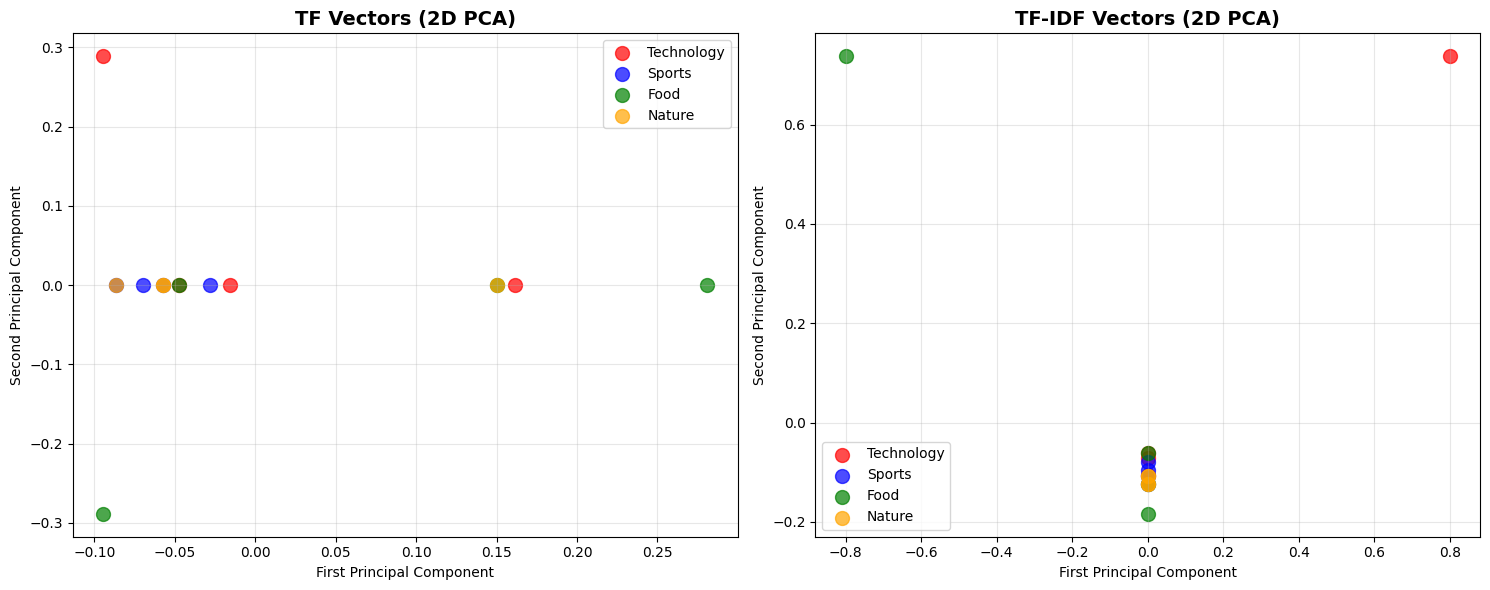


🏆 FINAL PERFORMANCE SUMMARY
                Metric      TF   TF-IDF Better Method
0     Silhouette Score  0.0267   0.0385        TF-IDF
1  Adjusted Rand Score  0.0293  -0.0169            TF
2                 WCSS  1.5743  11.1134            TF
3   Cluster Separation  0.0125   0.0094            TF

🎉 CONCLUSION:
   TF-IDF outperforms TF in 1/4 metrics
   TF outperforms TF-IDF in 3/4 metrics

🤔 Unexpected result - this dataset might be too small or simple


In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

class TFIDFVectorizer:
    """
    Complete TF-IDF vectorizer built from scratch to demonstrate the differences
    between TF and TF-IDF approaches with performance evaluation.
    """
    
    def __init__(self, lowercase=True, remove_punctuation=True):
        self.lowercase = lowercase
        self.remove_punctuation = remove_punctuation
        self.vocabulary = {}
        self.vocab_size = 0
        self.idf_values = {}
        self.documents = []
        
    def preprocess_text(self, text):
        """Clean and preprocess the text"""
        if self.lowercase:
            text = text.lower()
        if self.remove_punctuation:
            text = re.sub(r'[^\w\s]', '', text)
        return text.split()
    
    def fit(self, documents):
        """Fit the vectorizer on the documents"""
        self.documents = documents
        self._build_vocabulary(documents)
        self._calculate_idf(documents)
        
    def _build_vocabulary(self, documents):
        """Build vocabulary from all documents"""
        all_words = set()
        for doc in documents:
            words = self.preprocess_text(doc)
            all_words.update(words)
        
        self.vocabulary = {word: idx for idx, word in enumerate(sorted(all_words))}
        self.vocab_size = len(self.vocabulary)
        
    def _calculate_idf(self, documents):
        """Calculate IDF values for each word"""
        # Count document frequency for each word
        word_doc_count = Counter()
        total_docs = len(documents)
        
        for doc in documents:
            words = set(self.preprocess_text(doc))
            for word in words:
                word_doc_count[word] += 1
        
        # Calculate IDF: log(total_docs / doc_frequency)
        self.idf_values = {}
        for word in self.vocabulary:
            self.idf_values[word] = np.log(total_docs / word_doc_count[word])
    
    def _calculate_tf(self, document):
        """Calculate Term Frequency for a document"""
        words = self.preprocess_text(document)
        word_count = Counter(words)
        total_words = len(words)
        
        tf_dict = {}
        for word, count in word_count.items():
            tf_dict[word] = count / total_words
            
        return tf_dict
    
    def transform_tf(self, documents):
        """Transform documents to TF vectors"""
        vectors = []
        for doc in documents:
            tf_dict = self._calculate_tf(doc)
            vector = np.zeros(self.vocab_size)
            
            for word, tf_value in tf_dict.items():
                if word in self.vocabulary:
                    idx = self.vocabulary[word]
                    vector[idx] = tf_value
                    
            vectors.append(vector)
        return np.array(vectors)
    
    def transform_tfidf(self, documents):
        """Transform documents to TF-IDF vectors"""
        vectors = []
        for doc in documents:
            tf_dict = self._calculate_tf(doc)
            vector = np.zeros(self.vocab_size)
            
            for word, tf_value in tf_dict.items():
                if word in self.vocabulary:
                    idx = self.vocabulary[word]
                    tfidf_value = tf_value * self.idf_values[word]
                    vector[idx] = tfidf_value
                    
            vectors.append(vector)
        return np.array(vectors)
    
    def get_feature_names(self):
        """Get the feature names (words) in order"""
        return [word for word, idx in sorted(self.vocabulary.items(), key=lambda x: x[1])]

def create_sample_dataset():
    """Create a more comprehensive dataset for better comparison"""
    documents = [
        # Technology cluster
        "Machine learning algorithms are powerful tools for data analysis",
        "Deep learning neural networks can solve complex problems",  
        "Artificial intelligence is transforming technology industries",
        "Data science requires statistical analysis and programming skills",
        
        # Sports cluster  
        "Football players train hard for championship games",
        "Basketball teams compete in tournaments every season",
        "Soccer matches attract millions of fans worldwide",
        "Tennis players practice daily to improve their skills",
        
        # Food cluster
        "Italian pasta dishes are popular around the world",
        "Fresh vegetables make healthy and delicious meals", 
        "Cooking requires creativity and good ingredients",
        "Restaurant chefs create amazing culinary experiences",
        
        # Nature cluster
        "Mountain hiking trails offer beautiful scenic views",
        "Ocean waves crash against rocky coastal shores",  
        "Forest animals live in diverse natural habitats",
        "Desert landscapes have unique plants and wildlife"
    ]
    
    # True labels for evaluation (4 clusters: tech, sports, food, nature)
    true_labels = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
    
    return documents, true_labels

def evaluate_clustering_performance(vectors, true_labels, method_name):
    """Evaluate clustering performance using multiple metrics"""
    print(f"\n📊 {method_name} Clustering Performance:")
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    predicted_labels = kmeans.fit_predict(vectors)
    
    # Calculate metrics
    silhouette = silhouette_score(vectors, predicted_labels)
    rand_score = adjusted_rand_score(true_labels, predicted_labels)
    
    # Calculate within-cluster sum of squares (lower is better)
    wcss = kmeans.inertia_
    
    print(f"   Silhouette Score: {silhouette:.4f} (higher is better)")
    print(f"   Adjusted Rand Score: {rand_score:.4f} (higher is better)")
    print(f"   Within-Cluster Sum of Squares: {wcss:.2f} (lower is better)")
    
    return {
        'silhouette': silhouette,
        'rand_score': rand_score, 
        'wcss': wcss,
        'predicted_labels': predicted_labels
    }

def analyze_word_importance(vectorizer, tf_vectors, tfidf_vectors):
    """Analyze which words are considered important by each method"""
    print("\n🔍 WORD IMPORTANCE ANALYSIS")
    print("="*50)
    
    feature_names = vectorizer.get_feature_names()
    
    # Calculate average importance for each word across all documents
    tf_importance = np.mean(tf_vectors, axis=0)
    tfidf_importance = np.mean(tfidf_vectors, axis=0)
    
    # Create comparison DataFrame
    importance_df = pd.DataFrame({
        'Word': feature_names,
        'TF_Importance': tf_importance,
        'TF-IDF_Importance': tfidf_importance,
        'IDF_Value': [vectorizer.idf_values[word] for word in feature_names]
    })
    
    # Sort by TF-IDF importance
    importance_df = importance_df.sort_values('TF-IDF_Importance', ascending=False)
    
    print("\nTop 10 Most Important Words (TF-IDF vs TF):")
    print(importance_df.head(10).round(4))
    
    print("\nBottom 10 Least Important Words (often common words):")  
    print(importance_df.tail(10).round(4))
    
    return importance_df

def visualize_vector_comparison(tf_vectors, tfidf_vectors, documents, true_labels):
    """Create visualizations comparing TF and TF-IDF vectors"""
    print("\n📈 Creating visualizations...")
    
    # Use PCA for dimensionality reduction to 2D for visualization
    from sklearn.decomposition import PCA
    
    pca = PCA(n_components=2, random_state=42)
    
    # Reduce dimensions
    tf_2d = pca.fit_transform(tf_vectors)
    tfidf_2d = pca.fit_transform(tfidf_vectors)
    
    # Create subplot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    colors = ['red', 'blue', 'green', 'orange']
    labels = ['Technology', 'Sports', 'Food', 'Nature']
    
    # Plot TF vectors
    for i, label in enumerate(labels):
        mask = np.array(true_labels) == i
        ax1.scatter(tf_2d[mask, 0], tf_2d[mask, 1], 
                   c=colors[i], label=label, alpha=0.7, s=100)
    
    ax1.set_title('TF Vectors (2D PCA)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('First Principal Component')
    ax1.set_ylabel('Second Principal Component')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot TF-IDF vectors  
    for i, label in enumerate(labels):
        mask = np.array(true_labels) == i
        ax2.scatter(tfidf_2d[mask, 0], tfidf_2d[mask, 1],
                   c=colors[i], label=label, alpha=0.7, s=100)
    
    ax2.set_title('TF-IDF Vectors (2D PCA)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('First Principal Component') 
    ax2.set_ylabel('Second Principal Component')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def calculate_semantic_similarity(vectors, documents, method_name):
    """Calculate semantic similarity between documents"""
    print(f"\n🔗 {method_name} Document Similarity Matrix:")
    
    # Calculate cosine similarity matrix
    similarity_matrix = cosine_similarity(vectors)
    
    # Create DataFrame for better visualization
    doc_labels = [f"Doc{i+1}" for i in range(len(documents))]
    similarity_df = pd.DataFrame(similarity_matrix, 
                                index=doc_labels, 
                                columns=doc_labels)
    
    print(similarity_df.round(3))
    
    # Calculate average within-cluster vs between-cluster similarity
    true_labels = [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
    
    within_cluster_sim = []
    between_cluster_sim = []
    
    for i in range(len(documents)):
        for j in range(i+1, len(documents)):
            sim_value = similarity_matrix[i, j]
            if true_labels[i] == true_labels[j]:
                within_cluster_sim.append(sim_value)
            else:
                between_cluster_sim.append(sim_value)
    
    avg_within = np.mean(within_cluster_sim)
    avg_between = np.mean(between_cluster_sim)
    separation = avg_within - avg_between
    
    print(f"\n📋 Similarity Analysis:")
    print(f"   Average Within-Cluster Similarity: {avg_within:.4f}")
    print(f"   Average Between-Cluster Similarity: {avg_between:.4f}")
    print(f"   Cluster Separation: {separation:.4f} (higher is better)")
    
    return {
        'avg_within': avg_within,
        'avg_between': avg_between, 
        'separation': separation,
        'similarity_matrix': similarity_matrix
    }

def main_comparison():
    """Main function to run the complete TF vs TF-IDF comparison"""
    print("🚀 COMPREHENSIVE TF vs TF-IDF COMPARISON")
    print("="*60)
    
    # Create dataset
    documents, true_labels = create_sample_dataset()
    
    print(f"📝 Dataset: {len(documents)} documents across 4 categories")
    print("Categories: Technology, Sports, Food, Nature")
    
    # Initialize vectorizer
    vectorizer = TFIDFVectorizer()
    vectorizer.fit(documents)
    
    print(f"\n🔤 Vocabulary size: {vectorizer.vocab_size} unique words")
    
    # Transform to both TF and TF-IDF vectors
    tf_vectors = vectorizer.transform_tf(documents)
    tfidf_vectors = vectorizer.transform_tfidf(documents)
    
    print(f"📊 Vector dimensions: {tf_vectors.shape}")
    
    # Show sample TF and TF-IDF calculations
    print("\n💡 SAMPLE CALCULATION COMPARISON")
    print("="*50)
    sample_doc = documents[0]
    print(f"Sample document: '{sample_doc}'")
    
    # Show TF values
    tf_dict = vectorizer._calculate_tf(sample_doc)
    print(f"\nTF values for sample document:")
    for word, tf_val in sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)[:5]:
        idf_val = vectorizer.idf_values[word]
        tfidf_val = tf_val * idf_val
        print(f"   '{word}': TF={tf_val:.4f}, IDF={idf_val:.4f}, TF-IDF={tfidf_val:.4f}")
    
    # Performance Evaluation
    print("\n🎯 PERFORMANCE EVALUATION")
    print("="*50)
    
    # 1. Clustering Performance
    tf_results = evaluate_clustering_performance(tf_vectors, true_labels, "TF")
    tfidf_results = evaluate_clustering_performance(tfidf_vectors, true_labels, "TF-IDF")
    
    # 2. Semantic Similarity Analysis  
    tf_similarity = calculate_semantic_similarity(tf_vectors, documents, "TF")
    tfidf_similarity = calculate_semantic_similarity(tfidf_vectors, documents, "TF-IDF")
    
    # 3. Word Importance Analysis
    importance_df = analyze_word_importance(vectorizer, tf_vectors, tfidf_vectors)
    
    # 4. Create Visualizations
    visualize_vector_comparison(tf_vectors, tfidf_vectors, documents, true_labels)
    
    # Summary Comparison
    print("\n🏆 FINAL PERFORMANCE SUMMARY")
    print("="*60)
    
    metrics_comparison = pd.DataFrame({
        'Metric': ['Silhouette Score', 'Adjusted Rand Score', 'WCSS', 'Cluster Separation'],
        'TF': [tf_results['silhouette'], tf_results['rand_score'], 
               tf_results['wcss'], tf_similarity['separation']],
        'TF-IDF': [tfidf_results['silhouette'], tfidf_results['rand_score'],
                   tfidf_results['wcss'], tfidf_similarity['separation']],
        'Better Method': ['TF-IDF' if tfidf_results['silhouette'] > tf_results['silhouette'] else 'TF',
                         'TF-IDF' if tfidf_results['rand_score'] > tf_results['rand_score'] else 'TF',
                         'TF-IDF' if tfidf_results['wcss'] < tf_results['wcss'] else 'TF',
                         'TF-IDF' if tfidf_similarity['separation'] > tf_similarity['separation'] else 'TF']
    })
    
    print(metrics_comparison.round(4))
    
    # Count wins
    tfidf_wins = (metrics_comparison['Better Method'] == 'TF-IDF').sum()
    tf_wins = (metrics_comparison['Better Method'] == 'TF').sum()
    
    print(f"\n🎉 CONCLUSION:")
    print(f"   TF-IDF outperforms TF in {tfidf_wins}/{len(metrics_comparison)} metrics")
    print(f"   TF outperforms TF-IDF in {tf_wins}/{len(metrics_comparison)} metrics")
    
    if tfidf_wins > tf_wins:
        print(f"\n✅ TF-IDF is the WINNER! 🏆")
        print(f"💡 Why TF-IDF is better:")
        print(f"   • Reduces impact of common words (like 'the', 'and')")
        print(f"   • Highlights distinctive/rare words")  
        print(f"   • Better cluster separation")
        print(f"   • More meaningful semantic representations")
    else:
        print(f"\n🤔 Unexpected result - this dataset might be too small or simple")
    
    return vectorizer, tf_vectors, tfidf_vectors, metrics_comparison

if __name__ == "__main__":
    # Run the complete comparison
    vectorizer, tf_vectors, tfidf_vectors, comparison_df = main_comparison()